In [1]:
# Download data from:
# https://github.com/joy-shi1/simulated-data-selection-bias/
# Took example of Causal DAG 5

import numpy as np
import pandas as pd

#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/)
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes
from matplotlib.patches import Ellipse
#%matplotlib inline
import seaborn as sns; sns.set_context('notebook')

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

In [5]:
df = pd.read_csv("data/Simulated_DAG5.csv", index_col=False)
df.head()

,Unnamed: 0,A,Y,C,L,U
0,1,0.181420,4.476163,1,1,1
1,2,1.903190,3.853914,1,1,1
2,3,-0.578062,0.193613,0,0,0
3,4,5.219398,-0.333588,1,1,0
4,5,-1.231902,-0.502101,0,0,0


In [6]:
df = df.iloc[: , 1:]
df

,A,Y,C,L,U
0,0.181420,4.476163,1,1,1
1,1.903190,3.853914,1,1,1
2,-0.578062,0.193613,0,0,0
3,5.219398,-0.333588,1,1,0
4,-1.231902,-0.502101,0,0,0
...,...,...,...,...,...
24995,0.263380,4.701207,1,1,1
24996,5.408019,5.531823,1,1,1
24997,4.397560,4.551299,1,1,1
24998,-0.183395,5.217552,1,1,1


In [7]:
A, Y, C, L, U = df['A'].values, df['Y'].values, df['C'].values, df['L'].values, df['U'].values

c:\python\python38_data\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


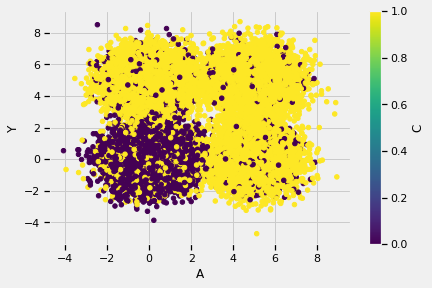

In [8]:
ax1 = df.plot.scatter(x='A',
                      y='Y',
                      c='C',
                      colormap='viridis')

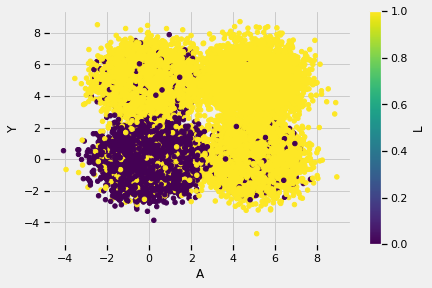

In [9]:
ax2 = df.plot.scatter(x='A',
                      y='Y',
                      c='L',
                      colormap='viridis')

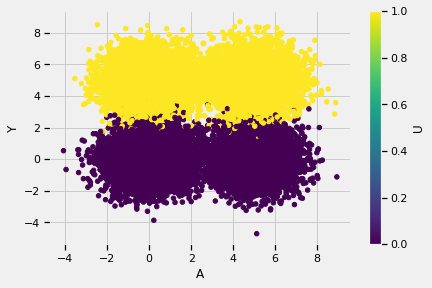

In [11]:
ax3 = df.plot.scatter(x='A',
                      y='Y',
                      c='U',
                      colormap='viridis')

In [12]:
np.corrcoef(A, Y)
# no correlation

array([[ 1.        , -0.00416154],
       [-0.00416154,  1.        ]])

In [13]:
# condition on C
A_cond_1, Y_cond_1 = A[C == 1], Y[C == 1]
A_cond_0, Y_cond_0 = A[C == 0], Y[C == 0]

In [14]:
np.corrcoef(A_cond_1, Y_cond_1)

array([[ 1.        , -0.25604051],
       [-0.25604051,  1.        ]])

In [15]:
np.corrcoef(A_cond_0, Y_cond_0)

array([[1.        , 0.19484203],
       [0.19484203, 1.        ]])

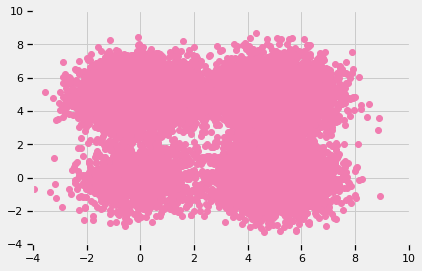

In [17]:
# correllation is not that easily visible on scatter plots -> usefulness of correlation statistic
plt.scatter(A_cond_1, Y_cond_1, color=TFColor[4])
plt.xlim([-4, 10])
plt.ylim([-4, 10])
plt.show()

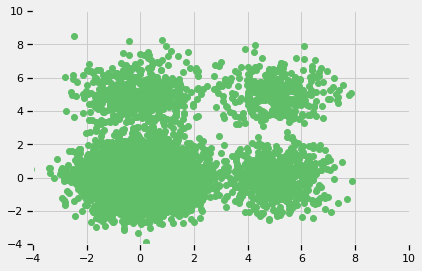

In [19]:
plt.scatter(A_cond_0, Y_cond_0, color=TFColor[2])
plt.xlim([-4, 10])
plt.ylim([-4, 10])
plt.show()

In [20]:
# condition on L
A_cond_1, Y_cond_1 = A[L == 1], Y[L == 1]
A_cond_0, Y_cond_0 = A[L == 0], Y[L == 0]

In [21]:
np.corrcoef(A_cond_1, Y_cond_1)

array([[ 1.        , -0.31767393],
       [-0.31767393,  1.        ]])

In [22]:
np.corrcoef(A_cond_0, Y_cond_0)

array([[ 1.        , -0.02491124],
       [-0.02491124,  1.        ]])

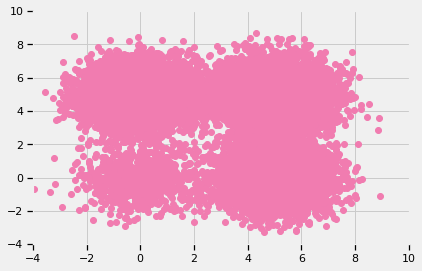

In [23]:
# correllation is not that easily visible on scatter plots -> usefulness of correlation statistic
plt.scatter(A_cond_1, Y_cond_1, color=TFColor[4])
plt.xlim([-4, 10])
plt.ylim([-4, 10])
plt.show()

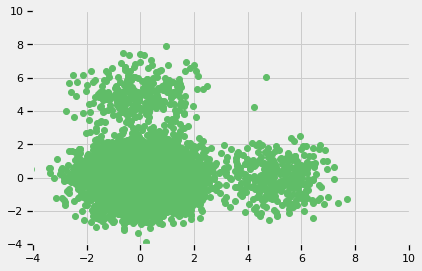

In [24]:
plt.scatter(A_cond_0, Y_cond_0, color=TFColor[2])
plt.xlim([-4, 10])
plt.ylim([-4, 10])
plt.show()

In [25]:
# condition on U
A_cond_1, Y_cond_1 = A[U == 1], Y[U == 1]
A_cond_0, Y_cond_0 = A[U == 0], Y[U == 0]

In [26]:
np.corrcoef(A_cond_1, Y_cond_1)
# no correllation

array([[1.        , 0.00258916],
       [0.00258916, 1.        ]])

In [27]:
np.corrcoef(A_cond_0, Y_cond_0)

array([[1.        , 0.00469952],
       [0.00469952, 1.        ]])

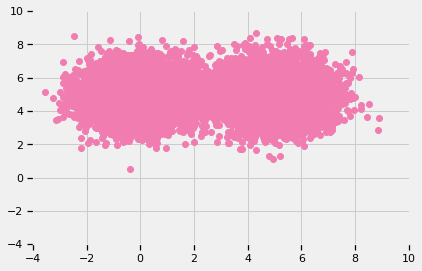

In [28]:
plt.scatter(A_cond_1, Y_cond_1, color=TFColor[4])
plt.xlim([-4, 10])
plt.ylim([-4, 10])
plt.show()

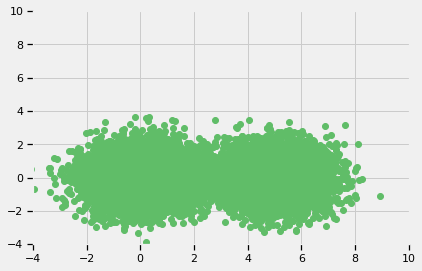

In [29]:
plt.scatter(A_cond_0, Y_cond_0, color=TFColor[2])
plt.xlim([-4, 10])
plt.ylim([-4, 10])
plt.show()

In [32]:
# check relation between L and C
np.corrcoef(L, C)
# strong association as expected

array([[1.        , 0.82160117],
       [0.82160117, 1.        ]])

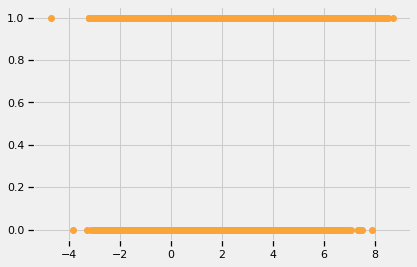

In [35]:
plt.scatter(Y, L, color=TFColor[1])

In [38]:
import seaborn as sns

c:\python\python38_data\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

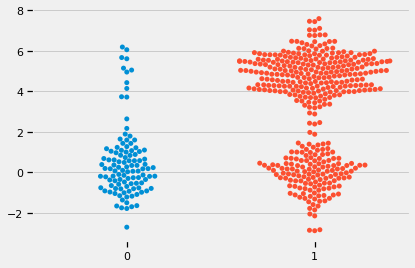

In [55]:
rand = int(23000*np.random.uniform())
sns.swarmplot(L[rand:rand+500], Y[rand:rand+500])

In [56]:
np.corrcoef(Y, L)

array([[1.        , 0.47311781],
       [0.47311781, 1.        ]])